In [1]:
!pip install -q hvplot

     |████████████████████████████████| 3.1 MB 4.3 MB/s 


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import hvplot.pandas
from scipy import stats

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [3]:
heart_data = pd.read_csv("heart.csv")
heart_data.head()  

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
print(heart_data.head())  # first 5
print(heart_data.tail())  # last 5
print(heart_data.shape)  # number of rows and column

print(heart_data.info())  # get information about whole dataset consist
print(pd.set_option("display.float", "{:.2f}".format))
print(heart_data.describe())  # displays summary statistics for a dataset
print('0 means Healthy Heart\n1 means Defective Heart below')
print('\n')
print(heart_data['target'].value_counts())  # 0 means Healthy Heart & 1 means Defective Heart

# Splitting the Features and Target
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']
print(X)  # consist all columns except target column
print('\n')
print(Y)  # consist Only Target column
print('\n')

categorical_val = []
continous_val = []
for column in heart_data.columns:
    if len(heart_data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)
print(categorical_val)

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
3

(14.5, -0.5)

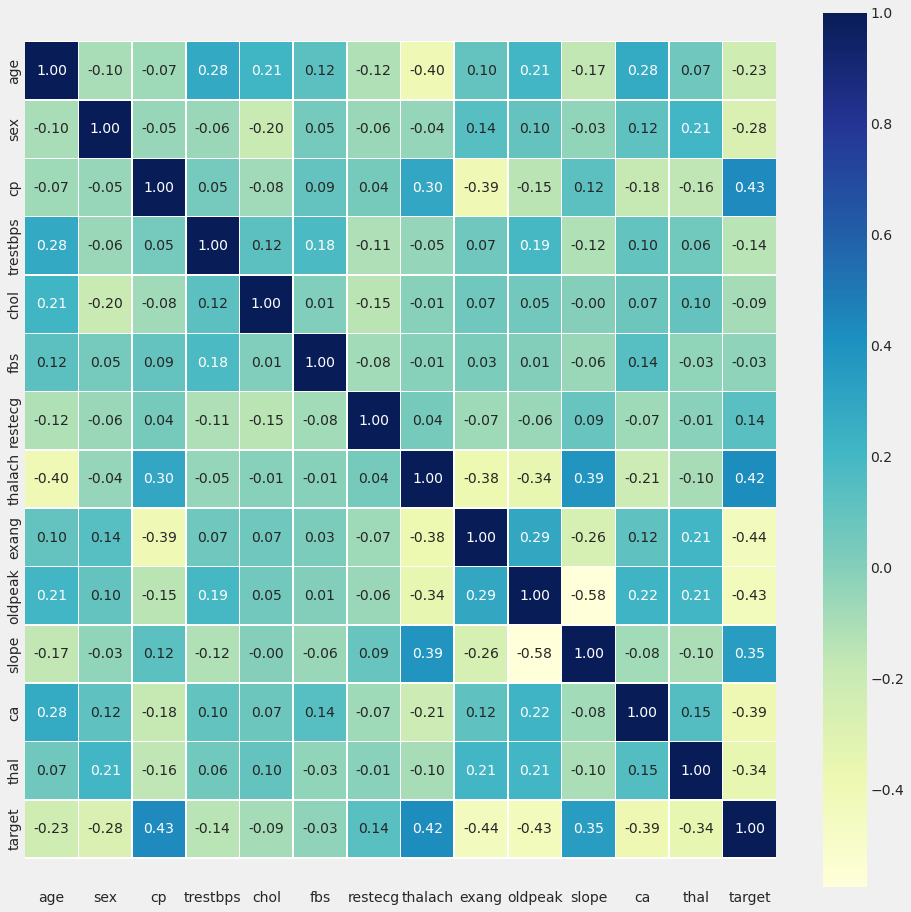

In [6]:
# Correlation Matrix
corr_matrix = heart_data.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

1.`fbs` and `chol` are the lowest correlated with the target variable.


2.All other variables have a significant correlation with the 






target variable.

:Bars   [index]   (0)
['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']


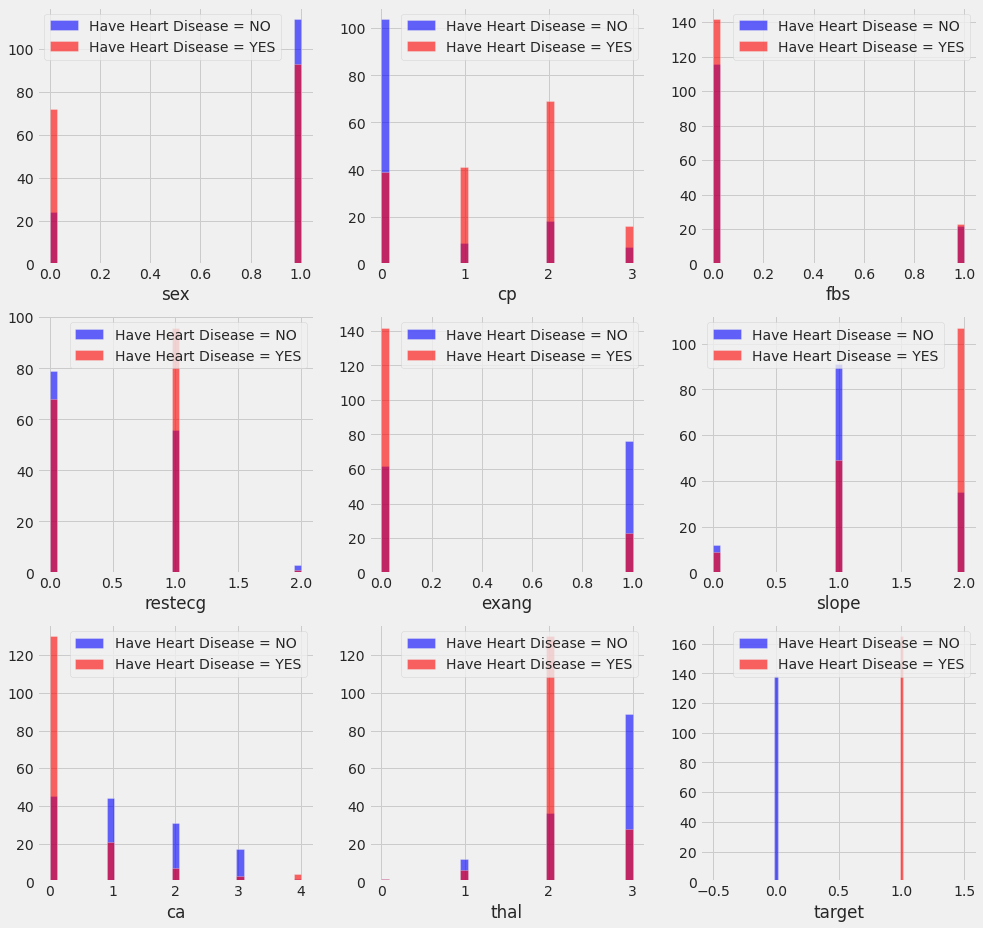

In [7]:
heart_data.drop('target', axis=1).corrwith(heart_data.target).hvplot.barh(
    width=600, height=400,
    title="Correlation between Heart Disease and Numeric Features",
    ylabel='Correlation', xlabel='Numerical Features',
)

#######################################################################################

print(heart_data.drop('target', axis=1).corrwith(heart_data.target).hvplot.barh(
    width=600, height=400,
    title="Correlation between Heart Disease and Numeric Features",
    ylabel='Correlation', xlabel='Numerical Features',
))

##############################################################

categorical_val = []
continous_val = []
for column in heart_data.columns:
    if len(heart_data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

print(categorical_val)
################################################################################3
have_disease = heart_data.loc[heart_data['target'] == 1, 'sex'].value_counts().hvplot.bar(alpha=0.4)
no_disease = heart_data.loc[heart_data['target'] == 0, 'sex'].value_counts().hvplot.bar(alpha=0.4)

((no_disease * have_disease).opts(
    title="Heart Disease by Sex", xlabel='Sex', ylabel='Count',
    width=500, height=450, legend_cols=2, legend_position='top_right'
))

#############################################################################################
have_disease = heart_data.loc[heart_data['target'] == 1, 'sex'].value_counts().hvplot.bar(alpha=0.4)
no_disease = heart_data.loc[heart_data['target'] == 0, 'sex'].value_counts().hvplot.bar(alpha=0.4)

(no_disease * have_disease).opts(
    title="Heart Disease by Sex", xlabel='Sex', ylabel='Count',
    width=500, height=450, legend_cols=2, legend_position='top_right'
)

#############################################################################################
have_disease = heart_data.loc[heart_data['target'] == 1, 'fbs'].value_counts().hvplot.bar(alpha=0.4)
no_disease = heart_data.loc[heart_data['target'] == 0, 'fbs'].value_counts().hvplot.bar(alpha=0.4)

(no_disease * have_disease).opts(
    title="Heart Disease by fasting blood sugar", xlabel='fasting blood sugar > 120 mg/dl (1 = true; 0 = false)',
    ylabel='Count', width=500, height=450, legend_cols=2, legend_position='top_right'
)

#############################################################################################
have_disease = heart_data.loc[heart_data['target'] == 1, 'restecg'].value_counts().hvplot.bar(alpha=0.4)
no_disease = heart_data.loc[heart_data['target'] == 0, 'restecg'].value_counts().hvplot.bar(alpha=0.4)

(no_disease * have_disease).opts(
    title="Heart Disease by resting electrocardiograph results", xlabel='resting electrocardiographic results',
    ylabel='Count', width=500, height=450, legend_cols=2, legend_position='top_right'
)

########################################### Multiple graph according to attribute ##################################################


plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    heart_data[heart_data["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO',
                                                       alpha=0.6)
    heart_data[heart_data["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES',
                                                       alpha=0.6)
    plt.legend()
    plt.xlabel(column)

plt.show()
############################################################################################################33


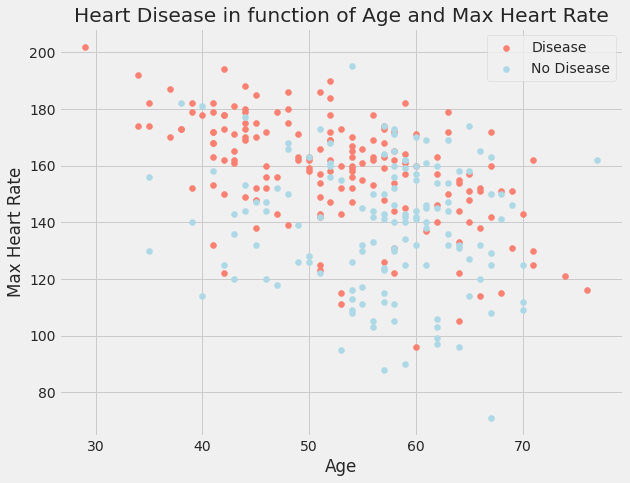

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')


,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.30,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.50,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.40,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.80,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.60,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [8]:
plt.figure(figsize=(9, 7))

# Scatter with postivie examples
plt.scatter(heart_data.age[heart_data.target == 1],
            heart_data.thalach[heart_data.target == 1],
            c="salmon")

# Scatter with negative examples
plt.scatter(heart_data.age[heart_data.target == 0],
            heart_data.thalach[heart_data.target == 0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])
plt.show()

#######################################################################################################

categorical_val.remove('target')
dataset = pd.get_dummies(heart_data, columns=categorical_val)
dataset.head()
print(heart_data.columns)
print(dataset.columns)

# from sklearn.preprocessing import StandardScaler

# s_sc=StandardScaler()
# col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
# dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])
dataset.head()


In [9]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

def print_score(clf, X_train, Y_train, X_test, Y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(Y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(Y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(Y_train, pred)}\n")

    elif not train:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(Y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(Y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(Y_test, pred)}\n")

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

In [10]:
from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1)
y = dataset.target
x = heart_data.drop('target', axis=1)
y = heart_data.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
print(X_train)
print("//////////////////////////////////")
print(x_train)
# print("??????????????????????")
# print(X_test) 
# print("??????????????????????")
# print(Y_train)
# print("??????????????????????")
# print(Y_test)
print(dataset.info)
print(dataset.describe)
print(heart_data.head)

     age  trestbps  chol  thalach  oldpeak  sex_0  sex_1  cp_0  cp_1  cp_2  \
237   60       140   293      170     1.20      0      1     1     0     0   
106   69       160   234      131     0.10      0      1     0     0     0   
10    54       140   239      160     1.20      0      1     1     0     0   
153   66       146   278      152     0.00      1      0     0     0     1   
77    59       140   221      164     0.00      0      1     0     1     0   
..   ...       ...   ...      ...      ...    ...    ...   ...   ...   ...   
75    55       135   250      161     1.40      1      0     0     1     0   
22    42       140   226      178     0.00      0      1     1     0     0   
72    29       130   204      202     0.00      0      1     0     1     0   
15    50       120   219      158     1.60      1      0     0     0     1   
168   63       130   254      147     1.40      0      1     1     0     0   

     ...  slope_2  ca_0  ca_1  ca_2  ca_3  ca_4  thal_0  thal_1

In [11]:
#################################### 1.Logistic Regression #####################
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, Y_train)
######### old model ##############
model_LR = LogisticRegression()
model_LR.fit(x_train, y_train)

print_score(lr_clf, X_train, Y_train, X_test, Y_test, train=True)

print_score(lr_clf, X_train, Y_train, X_test, Y_test, train=False)


###########################Checking Model	Training Accuracy &	Testing Accuracy ######################


test_score = accuracy_score(Y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(Y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df




Train Result:
Accuracy Score: 85.95%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.87   0.85      0.86       0.86          0.86
recall      0.80   0.90      0.86       0.85          0.86
f1-score    0.83   0.88      0.86       0.86          0.86
support   106.00 136.00      0.86     242.00        242.00
_______________________________________________
Confusion Matrix: 
 [[ 85  21]
 [ 13 123]]

Test Result:
Accuracy Score: 93.44%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  1.00  0.88      0.93       0.94          0.94
recall     0.88  1.00      0.93       0.94          0.93
f1-score   0.93  0.94      0.93       0.93          0.93
support   32.00 29.00      0.93      61.00         61.00
_______________________________________________
Confusion Matrix: 
 [[28  4]
 [ 0 29]]



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.95,93.44


In [12]:
#################################### 2.K-nearest neighbors #####################

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, Y_train)
model_knn = KNeighborsClassifier()
model_knn.fit(x_train, y_train)

print_score(knn_clf, X_train, Y_train, X_test, Y_test, train=True)
print_score(knn_clf, X_train, Y_train, X_test, Y_test, train=False)

test_score = accuracy_score(Y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(Y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]],
                            columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)

print(results_df)



Train Result:
Accuracy Score: 73.55%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.73   0.74      0.74       0.73          0.73
recall      0.63   0.82      0.74       0.72          0.74
f1-score    0.68   0.78      0.74       0.73          0.73
support   106.00 136.00      0.74     242.00        242.00
_______________________________________________
Confusion Matrix: 
 [[ 67  39]
 [ 25 111]]

Test Result:
Accuracy Score: 68.85%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.76  0.64      0.69       0.70          0.70
recall     0.59  0.79      0.69       0.69          0.69
f1-score   0.67  0.71      0.69       0.69          0.69
support   32.00 29.00      0.69      61.00         61.00
_______________________________________________
Confusion Matrix: 
 [[19 13]
 [ 6 23]]

                 Model  T

In [13]:
#################################### 3.Support Vector machine #####################

from sklearn.svm import SVC

svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train, Y_train)



print_score(svm_clf, X_train, Y_train, X_test, Y_test, train=True)
print_score(svm_clf, X_train, Y_train, X_test, Y_test, train=False)

test_score = accuracy_score(Y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(Y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]],
                            columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)

print(results_df)


  

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   106.00 136.00      1.00     242.00        242.00
_______________________________________________
Confusion Matrix: 
 [[106   0]
 [  0 136]]

Test Result:
Accuracy Score: 47.54%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.00  0.48      0.48       0.24          0.23
recall     0.00  1.00      0.48       0.50          0.48
f1-score   0.00  0.64      0.48       0.32          0.31
support   32.00 29.00      0.48      61.00         61.00
_______________________________________________
Confusion Matrix: 
 [[ 0 32]
 [ 0 29]]

                    Mode

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
#################################### 4.Decision Tree Classifier #####################

from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, Y_train)

print_score(tree_clf, X_train, Y_train, X_test, Y_test, train=True)
print_score(tree_clf, X_train, Y_train, X_test, Y_test, train=False)

test_score = accuracy_score(Y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(Y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]],
                            columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)

print(results_df)




Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   106.00 136.00      1.00     242.00        242.00
_______________________________________________
Confusion Matrix: 
 [[106   0]
 [  0 136]]

Test Result:
Accuracy Score: 85.25%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.96  0.78      0.85       0.87          0.87
recall     0.75  0.97      0.85       0.86          0.85
f1-score   0.84  0.86      0.85       0.85          0.85
support   32.00 29.00      0.85      61.00         61.00
_______________________________________________
Confusion Matrix: 
 [[24  8]
 [ 1 28]]

                      Mo

In [15]:
#################################### 5.Random Forest #####################

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, Y_train)

print_score(rf_clf, X_train, Y_train, X_test, Y_test, train=True)
print_score(rf_clf, X_train, Y_train, X_test, Y_test, train=False)

test_score = accuracy_score(Y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(Y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]],
                            columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)

print(results_df)





Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   106.00 136.00      1.00     242.00        242.00
_______________________________________________
Confusion Matrix: 
 [[106   0]
 [  0 136]]

Test Result:
Accuracy Score: 90.16%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  1.00  0.83      0.90       0.91          0.92
recall     0.81  1.00      0.90       0.91          0.90
f1-score   0.90  0.91      0.90       0.90          0.90
support   32.00 29.00      0.90      61.00         61.00
_______________________________________________
Confusion Matrix: 
 [[26  6]
 [ 0 29]]

                      Mo

In [16]:
model_svm_clf = SVC(kernel='rbf', gamma=0.2, C=1.0)
model_svm_clf.fit(x_train, y_train)

tree_clf = DecisionTreeClassifier(random_state=2)
tree_clf.fit(x_train, y_train)

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(x_train, y_train)

#['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
INPUT = (78,1,3,110,201,0,1,126,3.5,1,0,1,1)

input_data = INPUT  #Logical regreation prediction

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction_LR = model_LR.predict(input_data_reshaped)
prediction_KNN = model_knn.predict(input_data_reshaped)
prediction_SVM = model_svm_clf.predict(input_data_reshaped)
prediction_tree_clf = tree_clf.predict(input_data_reshaped)
prediction_RF_clf = rf_clf.predict(input_data_reshaped)



print(prediction_LR)
print(prediction_KNN)
print(prediction_SVM)
print(prediction_tree_clf)
print(prediction_RF_clf)
############## LR ####################
print("\nBy using Logical Regression : -",prediction_LR)
if (prediction_LR[0] == 0):
  print('\nThe Person does not have a Heart Disease')
else:
  print('\nThe Person has Heart Disease\n\n')
############# KNN #################
print("\nBy using  K-nearest neighbors : -",prediction_KNN)
if (prediction_KNN[0] == 0):
  print('\nThe Person does not have a Heart Disease')
else:
  print('\nThe Person has Heart Disease\n\n')
################### SVM #################
print("\nBy using  Support Vector Machine : -",prediction_SVM)
if (prediction_SVM[0] == 0):
  print('\nThe Person does not have a Heart Disease')
else:
  print('\nThe Person has Heart Disease\n\n')
################### Decision Tree Classifier ###################
print("\nBy using  Decision Tree Classifier : - ",prediction_tree_clf)
if (prediction_tree_clf[0] == 0):
  print('\nThe Person does not have a Heart Disease')
else:
  print('\nThe Person has Heart Disease\n\n')
#################### Random Forest ####################
print("\nBy using  Random Forest Classifier : -",prediction_RF_clf)
if (prediction_RF_clf[0] == 0):
  print('\nThe Person does not have a Heart Disease')
else:
  print('\nThe Person has Heart Disease\n\n')

[0]
[1]
[1]
[1]
[1]

By using Logical Regression : - [0]

The Person does not have a Heart Disease

By using  K-nearest neighbors : - [1]

The Person has Heart Disease



By using  Support Vector Machine : - [1]

The Person has Heart Disease



By using  Decision Tree Classifier : -  [1]

The Person has Heart Disease



By using  Random Forest Classifier : - [1]

The Person has Heart Disease




/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does 